In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as optimization
from tqdm.notebook import tqdm
import utilities as uts
from BHDVCStf import BHDVCS
import matplotlib.pyplot as plt

In [5]:
bhdvcs = BHDVCS()
df = pd.read_csv("dvcs_xs_newsets_genCFFs.csv")
data = uts.DvcsData(df)
filename="dvcs_xs_newsets_genCFFs.csv"

numSets = 15
numReplicas = 10

In [6]:
def SelectSet(setnum):
    tempdf=pd.read_csv(filename)
    full_data_size=len(tempdf["#Set"])
    temp_k=[]
    temp_QQ=[]
    temp_xb=[]
    temp_t=[]
    temp_phi=[]
    temp_F=[]
    temp_dF=[]
    print(full_data_size)
    for i in range(0,full_data_size):
        if(tempdf["#Set"][i]==setnum):
            temp_k.append(tempdf["k"][i])
            temp_phi.append(tempdf["phi_x"][i])
    return temp_phi

SelectSet(0)
sampleSet=data.getSet(0)
print(np.array(sampleSet.XnoCFF)[0])
#print(sampleSet.sampleY())
#print(np.array(sampleSet.erry))

540
[ 0.         3.75       1.74013    0.435095  -0.380868   0.49806
  0.68579    0.0122881]


In [7]:
def produceResults(data, numSets, numReplicas):
    results = []
    for i in tqdm(range(numSets)):
        replicas = []
        seti = data.getSet(i) # DvcsData object of kinematic set i
        X = np.array(seti.XnoCFF) # the kinematics and all variables necessary to compute 
        sigma = seti.erry # error in F
        pars = np.array([1, 1, 1])
        for i in range(numReplicas):
            y = seti.sampleY()
            cff, cffcov = optimization.curve_fit(bhdvcs.TotalUUXS, X, y, pars, sigma,method='lm')
            replicas.append(cff)
        results.append(replicas)
    return np.array(results)

#fit1=produceResults(data, numSets, numReplicas)
# def Histo(setnum,cffnum):    

In [8]:
def Histogram_Data(fitname,setnum,cffnum):
    Cffdat=[]
    LL=len(fitname[setnum])
    for i in range(LL):
        Cffdat.append(fitname[setnum][i][cffnum])
    return np.array(Cffdat)
#plt.hist(Histogram_Data(fit1,0,0))

In [ ]:
test_fit=produceResults(data, numSets, 500)

In [7]:
fit_open=np.fromfile("Methods/replicas500.txt")
reshaped_data=fit_open.reshape(15,500,3)

(array([  7.,  21.,  44., 100., 145., 108.,  50.,  20.,   3.,   2.]),
 array([-1.49235544,  0.26662297,  2.02560139,  3.78457981,  5.54355822,
         7.30253664,  9.06151505, 10.82049347, 12.57947189, 14.3384503 ,
        16.09742872]),
 <a list of 10 Patch objects>)

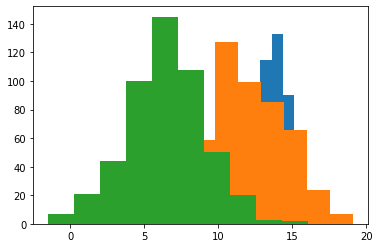

In [8]:
plt.hist(Histogram_Data(reshaped_data,0,0))
plt.hist(Histogram_Data(reshaped_data,1,0))
plt.hist(Histogram_Data(reshaped_data,2,0))

In [9]:
def SelectOriginal(setnum):
    tempdf=pd.read_csv(filename)
    full_data_size=len(tempdf["#Set"])
    temp_ReH=[]
    temp_ReE=[]
    temp_ReHtilde=[]
    for i in range(0,full_data_size):
        if(tempdf["#Set"][i]==setnum):
            temp_ReH.append(tempdf["ReH"][i])
            temp_ReE.append(tempdf["ReE"][i])
            temp_ReHtilde.append(tempdf["ReHtilde"][i])
    return temp_ReH[0],temp_ReE[0],temp_ReHtilde[0]

print(SelectOriginal(0))

(13.0554, -53.0554, 7.253019999999999)


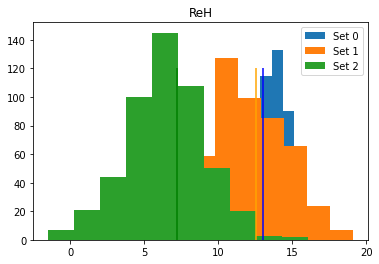

In [10]:
f1=plt.figure(1)
plt.hist(Histogram_Data(reshaped_data,0,0),label='Set 0')
plt.hist(Histogram_Data(reshaped_data,1,0),label='Set 1')
plt.hist(Histogram_Data(reshaped_data,2,0),label='Set 2')
plt.vlines(x = SelectOriginal(0)[0], ymin = 0, ymax = 120, colors = 'blue')
plt.vlines(x = SelectOriginal(1)[0], ymin = 0, ymax = 120, colors = 'orange') 
plt.vlines(x = SelectOriginal(2)[0], ymin = 0, ymax = 120, colors = 'green') 
plt.title("ReH")
plt.legend()
plt.savefig("ReH_for_3_sets.pdf")

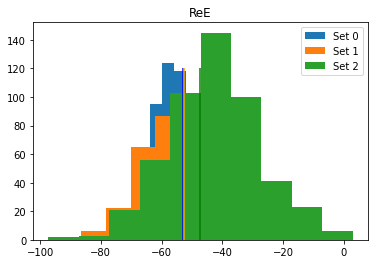

In [11]:
f2=plt.figure(2)
plt.hist(Histogram_Data(reshaped_data,0,1),label='Set 0')
plt.hist(Histogram_Data(reshaped_data,1,1),label='Set 1')
plt.hist(Histogram_Data(reshaped_data,2,1),label='Set 2')
plt.vlines(x = SelectOriginal(0)[1], ymin = 0, ymax = 120, colors = 'blue')
plt.vlines(x = SelectOriginal(1)[1], ymin = 0, ymax = 120, colors = 'orange') 
plt.vlines(x = SelectOriginal(2)[1], ymin = 0, ymax = 120, colors = 'green') 
plt.title("ReE")
plt.legend()
plt.savefig("ReE_for_3_sets.pdf")

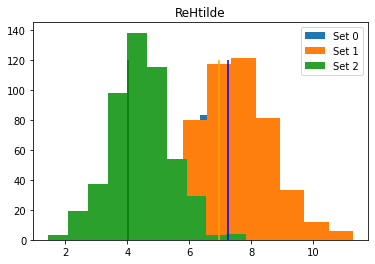

In [12]:
f3=plt.figure(3)
plt.hist(Histogram_Data(reshaped_data,0,2),label='Set 0')
plt.hist(Histogram_Data(reshaped_data,1,2),label='Set 1')
plt.hist(Histogram_Data(reshaped_data,2,2),label='Set 2')
plt.vlines(x = SelectOriginal(0)[2], ymin = 0, ymax = 120, colors = 'blue')
plt.vlines(x = SelectOriginal(1)[2], ymin = 0, ymax = 120, colors = 'orange') 
plt.vlines(x = SelectOriginal(2)[2], ymin = 0, ymax = 120, colors = 'green') 
plt.title("ReHtilde")
plt.legend()
plt.savefig("ReHtilde_for_3_sets.pdf")

In [15]:
def CFF_Mean_Sigma(fitname,setnum,cffnum):
    Cffdat=[]
    LL=len(fitname[setnum])
    for i in range(LL):
        Cffdat.append(fitname[setnum][i][cffnum])
    CFF_mean=np.mean(Cffdat)
    CFF_sigma=np.std(Cffdat)
    return CFF_mean,CFF_sigma

print(CFF_Mean_Sigma(reshaped_data,0,0))    

(13.817187264736308, 1.1210547016195158)


In [16]:
def Produce_CFF_replicas(fitname,setnum,cffnum,NRep):
    Cffdat=[]
    LL=len(fitname[setnum])
    for i in range(LL):
        Cffdat.append(fitname[setnum][i][cffnum])
    CFF_mean=np.mean(Cffdat)
    CFF_sigma=np.std(Cffdat)
    temp_replica_CFF=np.random.normal(CFF_mean,CFF_sigma,NRep)
    return np.array(temp_replica_CFF)

#print(Produce_CFF_replicas(fit2,0,0,500))

In [17]:
#print(data.getSet(0).XnoCFF)
#Produce_CFF_replicas(test_fit,0,0,500)
len(data.getSet(0).XnoCFF)
#Produce_CFF_replicas(test_fit,0,0,500)

35

## Defining NN A

In [18]:
CFF_replicas=reshaped_data[:, :36, :].reshape(15*36,3)

In [19]:
CFF_replicas.shape

(540, 3)

In [20]:
CFF_replicas

array([[ 13.26033982, -54.25014626,   6.0603415 ],
       [ 13.43037993, -55.1387322 ,   7.01520403],
       [ 13.02833   , -52.80332184,   6.8953582 ],
       ...,
       [ 10.31023481, -43.49615916,   7.21217834],
       [ 11.30582   , -49.38420127,   6.35487218],
       [  8.00939274, -31.0480426 ,   5.64329517]])

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# input 1: kinematics
kinematics = tf.keras.Input(shape=(4))
# input 2: CFFs from the replicas produced using the baseline fit
cffs_rep = tf.keras.Input(shape=(3))
# input 3: non-CFF input
noncffInputs = tf.keras.Input(shape=(8))
# Feed in all variables
Concat_kin_cffs = tf.keras.layers.concatenate([kinematics,cffs_rep])
x = tf.keras.layers.Dense(20, activation="tanh")(Concat_kin_cffs)
outputs = tf.keras.layers.Dense(3)(x)
totalUUXSInputs = tf.keras.layers.concatenate([outputs,noncffInputs])
F = uts.TotalUUXSlayer()(totalUUXSInputs) # incorporate cross-sectional function


#x1 = tf.keras.layers.Dense(20, activation="tanh")(kinematics)
#outputs = tf.keras.layers.Dense(3)(x) #three output nodes for ReH, ReE, ReHtilde
globalModel = tf.keras.Model(inputs=[kinematics, noncffInputs], outputs=F, name="GlobalModel")
#tf.keras.utils.plot_model(globalModel, "cffs.png", show_shapes=True)

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_2:0", shape=(None, 3), dtype=float32) at layer "input_2". The following previous layers were accessed without issue: ['input_1']

## Data and Imports

In [14]:
import pandas as pd
import numpy as np
import scipy.optimize as optimization
from tqdm.notebook import tqdm
import utilities as uts
from BHDVCStf import BHDVCS
import matplotlib.pyplot as plt

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

In [16]:
bhdvcs = BHDVCS()
df = pd.read_csv("dvcs_xs_newsets_genCFFs.csv")
data = uts.DvcsData(df)

numSets = 15
numReplicas = 10

In [17]:
fit_open = np.fromfile("replicas500.txt")
localFits = fit_open.reshape(15,500,3)

In [19]:
X1=data.Kinematics
X2=data.XnoCFF

y1=localFits
y2=data.y

In [36]:
rescaler = MinMaxScaler()

rescaler = rescaler.fit(X1)
X1 = rescaler.transform(X1)

# Model definition

In [20]:
kins = tf.keras.Input(shape=(4))
x = tf.keras.layers.Dense(20, activation="relu")(kins)
x = tf.keras.layers.Dense(20, activation="relu")(x)
cffs = tf.keras.layers.Dense(3)(x) #three output nodes for ReH, ReE, ReHtilde
noncffInputs = tf.keras.Input(shape=(8))
totalUUXSInputs = tf.keras.layers.concatenate([noncffInputs, cffs])
F = uts.TotalUUXSlayer()(totalUUXSInputs) # incorporate cross-sectional function

globalModel = tf.keras.Model(inputs=[kins, noncffInputs], outputs=[cffs, F], name="GlobalModel")

In [21]:
orig_weights = globalModel.get_weights()

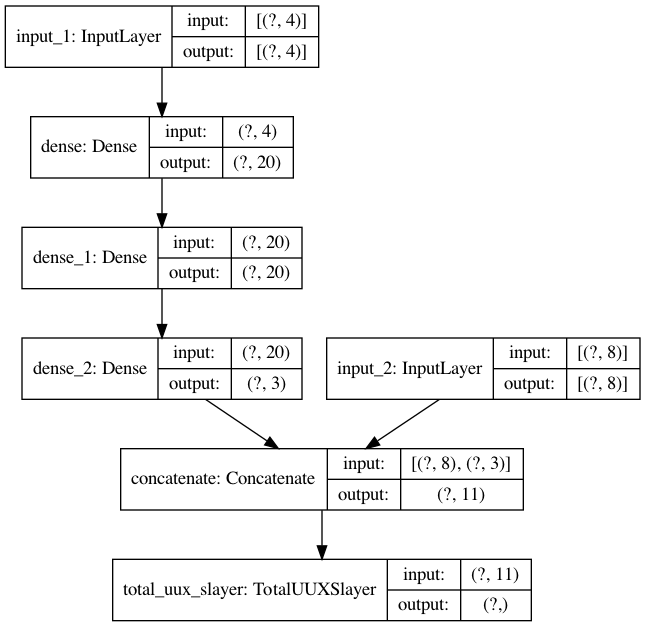

In [22]:
tf.keras.utils.plot_model(globalModel, "cffs.png", show_shapes=True)

In [25]:
globalModel.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.005),
    loss = [tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanSquaredError()],
)

In [27]:
1/data.erry

0      343.613092
1      359.736817
2      301.419081
3      291.312479
4      274.856662
          ...    
535    834.000534
536    789.091598
537    826.767422
538    974.165140
539    957.350055
Name: errF, Length: 540, dtype: float64

In [ ]:
globalModel.fit()

In [ ]:
CFF_replicas=reshaped_data[:, :36, :].reshape(15*36,3)

In [24]:
def train_test(arr, obsinset, whichset):
    train = np.delete(arr, slice((obsinset*whichset), (obsinset*(whichset+1))), axis=0)
    test = arr[(obsinset*whichset):(obsinset*(whichset+1)), :]
    return train, test

In [44]:
def produceResults(model, data, localFits, orig_weights, numSets, numReplicas, epochs=100):
    '''
    Essentially LOO cross-val with y-values being generated from seperate local fit
    
    globalModel: a tensorflow neural network model
    kins: rescaled kinematics
    X: dvcsdata of whole set
    localFits: the 
    orig_weights: the original weights from when the model was created (used to reset model after it has been trained)
    numSets: the number of kinematic sets
    numReplicas: the number of replicas
    
    returns: np array of cff predictions of shape (numSets, numReplicas, numCFFs)
    '''
    
    X1=np.array(data.Kinematics)
    X2=np.array(data.XnoCFF)

    #y1=localFits[:, :36, :].reshape(numSets*36,3)
    y2=np.array(data.y).reshape(-1, 1)
    
    rescaler = MinMaxScaler()

    rescaler = rescaler.fit(X1)
    X1 = rescaler.transform(X1)
    
    by_set = []
    for i in tqdm(range(numSets)):
        
        train_X1, valid_X1 = train_test(X1, 36, i)
        train_X2, valid_X2 = train_test(X2, 36, i)
                
        by_rep = []
        for rep in range(numReplicas):
            
            idxs = np.random.choice(list(range(localFits.shape[1])), size=36, replace=False)
            y1 = localFits[:, idxs, :].reshape(numSets*36, 3)
            train_y1, test_y1 = train_test(y1, 36, i)
            
            train_weights, _ = train_test(1/np.array(data.erry).reshape(-1, 1), 36, i)
            
            y2 = np.array(data.sampleY()).reshape(-1, 1)
            train_y2, test_y2 = train_test(y2, 36, i)
            train_y2 = train_y2[:, 0]
            
            model.set_weights(orig_weights)
            model.fit(x=[train_X1, train_X2], y=[train_y1, train_y2], sample_weight={'total_uux_slayer': train_weights},
                      epochs=epochs, verbose=0)

            by_rep.append(list(model.predict([valid_X1, valid_X2])[0][0, :]))
        
        by_set.append(by_rep)
    return np.array(by_set), rescaler

In [45]:
results, rescaler = produceResults(globalModel, data, localFits, orig_weights, 15, 10)

TypeError: 'NoneType' object is not callable

# ReH

Mean percent error:  10.138732015447234
RMSE:  1.168399989923221
RMSE w yhat=mean:  2.5254628436780107
R-squared:  0.7859569540519338


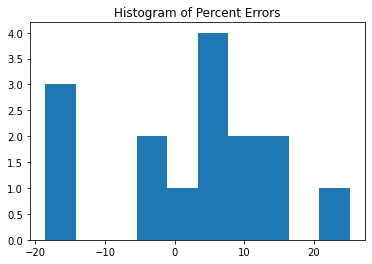

In [90]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 0)
uts.evaluate(y_yhat)

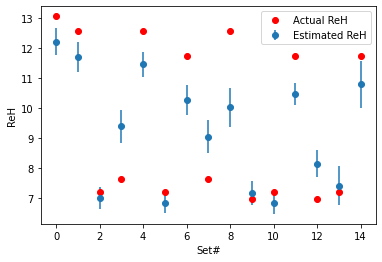

In [91]:
uts.plotError(y_yhat, err, "ReH")

# ReE

Mean percent error:  10.092280826204368
RMSE:  5.304596820778269
RMSE w yhat=mean:  2.525480507907797
R-squared:  -3.411809174933711


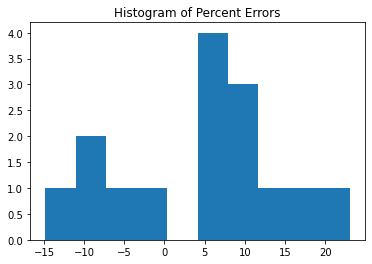

In [92]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 1)
uts.evaluate(y_yhat)

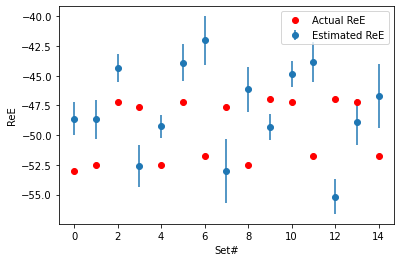

In [93]:
uts.plotError(y_yhat, err, "ReE")

# ReHtilde

Mean percent error:  7.870110141661697
RMSE:  0.5615090398882477
RMSE w yhat=mean:  1.4030345621243816
R-squared:  0.8398316262807037


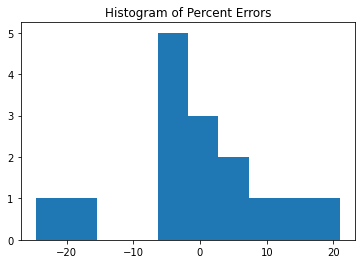

In [94]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 2)
uts.evaluate(y_yhat)

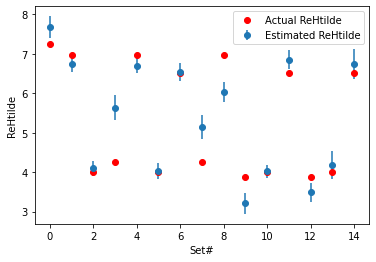

In [95]:
uts.plotError(y_yhat, err, "ReHtilde")

# Propagated Fs at 180

Mean percent error:  8.91950145098461
RMSE:  0.003575595891289538
RMSE w yhat=mean:  0.015855649879790133
R-squared:  0.9491455730831001


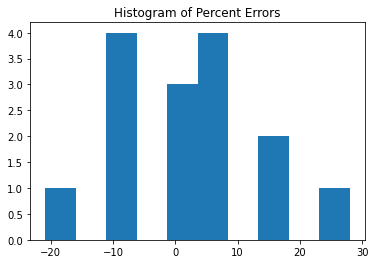

In [96]:
y_yhat, err = uts.y_yhat_errFs(results, data)
uts.evaluate(y_yhat)

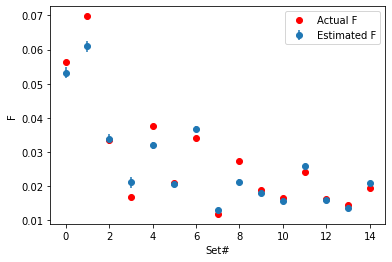

In [97]:
uts.plotError(y_yhat, err, "F")